<a href="https://colab.research.google.com/github/maitri2323/decision-tree-implementation/blob/main/CLASSIFICATION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# Image Classification using CNN  
**Author:** Maitri Chauhan  
**Project:** Classification Model (Project 3)  
**Goal:** Build a Convolutional Neural Network (CNN) to classify images and evaluate its performance.
We’ll use TensorFlow and a sample image dataset to build, train, and evaluate our model.  
**Position:** Student of Computer Engineering  

In [ ]:
!pip install -q tensorflow matplotlib numpy
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

##  Load Dataset
We will use the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes.

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


##  Build the CNN Model
Now let's create a CNN with Conv2D, MaxPooling, and Dense layers.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

##  Compile and Train
Compile the model and train it on training data.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 42ms/step - accuracy: 0.3771 - loss: 1.7172 - val_accuracy: 0.5715 - val_loss: 1.2166
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.5893 - loss: 1.1693 - val_accuracy: 0.6280 - val_loss: 1.0831
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.6443 - loss: 1.0276 - val_accuracy: 0.6197 - val_loss: 1.1149
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6697 - loss: 0.9478 - val_accuracy: 0.6731 - val_loss: 0.9500
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6998 - loss: 0.8655 - val_accuracy: 0.6845 - val_loss: 0.9253
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.7146 - loss: 0.8253 - val_accuracy: 0.6828 - val_loss: 0.9354
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7314 - loss: 0.7693 - val_accuracy: 0.6878 - val_loss: 0.9253
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.7493 -

**bold text**##  Model Evaluation
Evaluate accuracy and visualize training vs validation performance.

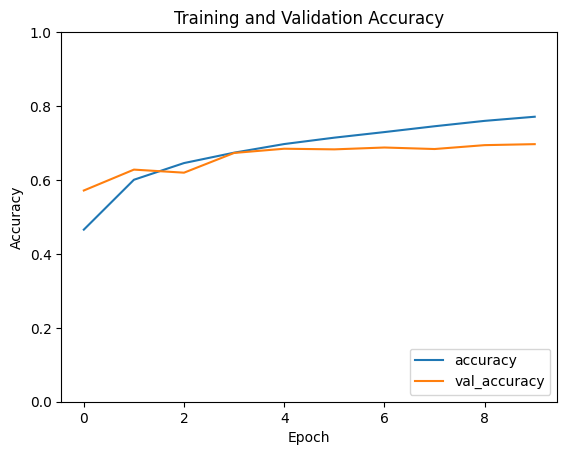

313/313 - 4s - 13ms/step - accuracy: 0.6969 - loss: 0.9300

Test accuracy: 0.6969000101089478


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)